<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [178]:
import pandas as pd
import numpy as np
import psycopg2
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

In [179]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
# для подключения будем использовать yaml файл, чтобы не удалять данные для подключения каждый раз при синхронизации с github
with open('config.yaml') as f:
    data = yaml.safe_load(f)

In [180]:
connection = psycopg2.connect(
    dbname=data['DBNAME'],
    user=data['USER'],
    host=data['HOST'],
    password=data['PASSWORD'],
    port=data['PORT']
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [181]:
# текст запроса - выбираем данные в соответствии с заданием
query_3_1 = f'''select
                    count(*) "Количество вакансий"
                from
                    public.vacancies
'''

# выбираем данные для визуализации всей таблицы
query_3_1_1 = f'''select
                    *
                from
                    public.vacancies
'''

In [182]:
# результат запроса
vacan_qty = pd.read_sql_query(query_3_1, connection)
answer = vacan_qty['Количество вакансий'][0]
display(vacan_qty)
print(f'Количество вакансий составляет: {answer}')

# выводим всю таблицу с вакансиями
vacan_df = pd.read_sql_query(query_3_1_1, connection)
display(vacan_df.head())

,Количество вакансий
0,49197


Количество вакансий составляет: 49197


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,NaN,1516,5724811
1,55843014,Системный администратор,Средства криптографической защиты информации\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,130,4903713
2,54525964,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,160,69961
3,54525965,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,159,69961
4,55354053,Специалист службы поддержки с техническими зна...,None,Удаленная работа,Нет опыта,Частичная занятость,15000.0,NaN,1955,1740


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [183]:
# текст запроса - выбираем данные в соответствии с заданием
query_3_2 = f'''select
                    count(*) "Количество работадателей"
                from
                    public.employers
'''

# выводим всю таблицу с работодателями
query_3_2_1 = f'''select
                    *
                from
                    public.employers
'''

In [184]:
# результат запроса
employer_qty = pd.read_sql_query(query_3_2, connection)
answer = employer_qty['Количество работадателей'][0]
display(employer_qty)
print(f'Количество работадателей составляет: {answer}')

# выводим всю таблицу работодателей
employer_df = pd.read_sql_query(query_3_2_1, connection)
display(employer_df.head())

,Количество работадателей
0,23501


Количество работадателей составляет: 23501


,id,name,area
0,2393,"Программный Продукт, ИТ-компания",1
1,72977,БАРС Груп,88
2,3155,"Бест, Торгово-производственная компания, Екате...",3
3,675,КОРУС Консалтинг,2
4,1840010,филиал ФКУ Налог-Сервис ФНС России в Республик...,88


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [185]:
# текст запроса - выбираем данные в соответствии с заданием
query_3_3 = f'''select
                    count(*) "Количество регионов"
                from 
                    public.areas
'''

# выводим всю таблицу с регионами
query_3_3_1 = f'''select
                    *
                from 
                    public.areas
'''


In [186]:
# результат запроса
area_qty = pd.read_sql_query(query_3_3, connection)
display(area_qty)
answer = area_qty['Количество регионов'][0]
print(f'Количество регионов составляет: {answer}')

# выводим всю таблицу с регионами
area_df = pd.read_sql_query(query_3_3_1, connection)
display(area_df.head())

,Количество регионов
0,1362


Количество регионов составляет: 1362


,id,name
0,2758,Тбилиси
1,8,Майкоп
2,1180,Нерюнгри
3,1240,Новокузнецк
4,2,Санкт-Петербург


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [187]:
# текст запроса - выбираем данные в соответствии с заданием
query_3_4 = '''select
                    count(*) "Количество сфер деятельности"
                from
                    public.industries
'''

# выводим таблицу со всеми сферами деятельности
query_3_4_1 = '''select
                    *
                from
                    public.industries
'''

In [188]:
# результат запроса
indust_qty = pd.read_sql_query(query_3_4, connection)
display(indust_qty)
answer = indust_qty['Количество сфер деятельности'][0]
print(f'Количество сфер деятельности составляет: {answer}')

# выводим таблицу со всеми сферами деятельности
indust_df = pd.read_sql_query(query_3_4_1, connection)
display(indust_df.head())

,Количество сфер деятельности
0,294


Количество сфер деятельности составляет: 294


,id,name
0,7.540,Разработка программного обеспечения
1,7.539,"Системная интеграция, автоматизации технологи..."
2,27.550,Безалкогольные напитки (производство)
3,27.551,"Безалкогольные напитки (продвижение, оптовая т..."
4,13.664,Управление и эксплуатация недвижимости


***

In [189]:
# выводы по предварительному анализу данных
totals = pd.concat([vacan_qty, employer_qty, area_qty, indust_qty], axis=1)
totals['Вакансии в регионе (среднее)'] = round(totals['Количество вакансий'] / totals['Количество регионов'])
totals['Вакансий на работодателя (среднее)'] = round(totals['Количество вакансий'] / totals['Количество работадателей'])
display(totals)



,Количество вакансий,Количество работадателей,Количество регионов,Количество сфер деятельности,Вакансии в регионе (среднее),Вакансий на работодателя (среднее)
0,49197,23501,1362,294,36.0,2.0


Предварительный анализ показывает, что при относительно большом количестве работодателей и регионов, количество вакансий достаточно скромное (всего две вакансии в среднем на работодателя и 36 вакансий в среднем в каждом регионе). Это может свидетельствовать о том, что далеко не во всех регионах вакансии распределены равномерно: есть регионы с очень большим количеством вакансий (наиболее крупные города), в небольших городах ситуация абсолютно противоположная - такие города зачастую сами являются донорами трудовых ресурсов для крупных городов, исключением могут являться небольшие города, куда в основном приезжают работать вахтовым методом (добыча полезных ископаемых, сезонная работа по добыче биоресурсов (например, путина лосося на Дальнем Востоке), моногорода с крупными промышленными предприятиями). Аналогично вакансии очень неравномерно распределены и среди работодателей - у крупных команий могут быть сотни вакансий, причем размещены эти вакансии могут быть во многих регионах, тогда как у небольших предприятий всего одна - две вакансии. Дальнейший анализ покажет, как же происходит распределение вакансий, и какие работодатели преобладают на рынке. 
Было бы неплохо иметь в базе данных некоторые дополнительные сведения - требования к образованию соискателя, знание иностранных языков, гражданство, для регионов - более крупная группировка, например по областям или федеральным округам.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [190]:
# текст запроса
query_4_1 = '''select
                    a.name "Регион",
                    count(v.id) "Количество вакансий"
                from 
                    public.areas a
                join 
                    public.vacancies v on a.id = v.area_id
                group by 1
                order by 2 desc
'''

In [191]:
# результат запроса
area_vacan = pd.read_sql_query(query_4_1, connection)
print('Количество вакансий в каждом регионе:')
display(area_vacan.head())

Количество вакансий в каждом регионе:


,Регион,Количество вакансий
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [192]:
# текст запроса
# также добавляем еще одну строчку, чтобы посчитать, у скольких вакансий не указана зарплата. Это нужно будет для визуализации и анализа.
query_4_2 = '''select
                    'ЗП указана' "Указана ли ЗП?",    
                    count(*) "Количество вакансий"
                from
                    public.vacancies
                where 
                    salary_from is not null
                or 
                    salary_to is not null
                    
                union all
                
                select
                    'ЗП не указана',
                    count(*)
                from
                    public.vacancies
                where 
                    salary_from is null and salary_to is null
                order by 2    
                
'''

In [193]:
# результат запроса
vacan_salaries = pd.read_sql_query(query_4_2, connection)
display(vacan_salaries)
answer = vacan_salaries['Количество вакансий'][1]
print('')
print(f'Количество вакансий с заполненными полями ЗП составляет: {answer}')

,Указана ли ЗП?,Количество вакансий
0,ЗП указана,24073
1,ЗП не указана,25124



Количество вакансий с заполненными полями ЗП составляет: 25124


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [194]:
# текст запроса
query_4_3 = '''select
                    round(avg(salary_from)) "Среднее нижней границы ЗП",
                    round(avg(salary_to)) "Среднее верхней границы ЗП"
                from
                    public.vacancies
'''

In [195]:
# результат запроса
avg_salaries = pd.read_sql_query(query_4_3, connection)
display(avg_salaries)
answer = avg_salaries.loc[0]
print('')
print(f'Среднее значение нижней границы зарплатной вилки: {answer[0]} рублей')
print(f'Среднее значение верхней границы зарплатной вилки: {answer[1]} рублей')

,Среднее нижней границы ЗП,Среднее верхней границы ЗП
0,71065.0,110537.0



Среднее значение нижней границы зарплатной вилки: 71065.0 рублей
Среднее значение верхней границы зарплатной вилки: 110537.0 рублей


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [196]:
# текст запроса
# в этом запросе поля shedule и employment объеденены в единое поле, так будет проще визуализировать полученные данные
query_4_4 = '''select                    
                    schedule || '/' || employment "График/Трудоустройство",
                    count(*) "Количество вакансий"
                from
                    public.vacancies
                group by schedule, employment
                order by 2 desc 
'''

In [197]:
# результат запроса
schedule_employment = pd.read_sql_query(query_4_4, connection)
display(schedule_employment.head())
print('')
print('Вторая по популярности пара "график работы - тип трудоустройства":')
display(schedule_employment.iloc[[1]])

,График/Трудоустройство,Количество вакансий
0,Полный день/Полная занятость,35367
1,Удаленная работа/Полная занятость,7802
2,Гибкий график/Полная занятость,1593
3,Удаленная работа/Частичная занятость,1312
4,Сменный график/Полная занятость,940



Вторая по популярности пара "график работы - тип трудоустройства":


,График/Трудоустройство,Количество вакансий
1,Удаленная работа/Полная занятость,7802


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [198]:
# текст запроса
query_4_5 = '''select
                    experience "Требуемый опыт работы",
                    count(*) "Количество вакансий"                    
                from
                    public.vacancies
                where experience is not null
                group by 1
                order by count(*) 
'''

In [199]:
# результат запроса
exp_info = pd.read_sql_query(query_4_5, connection)
display(exp_info)

,Требуемый опыт работы,Количество вакансий
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

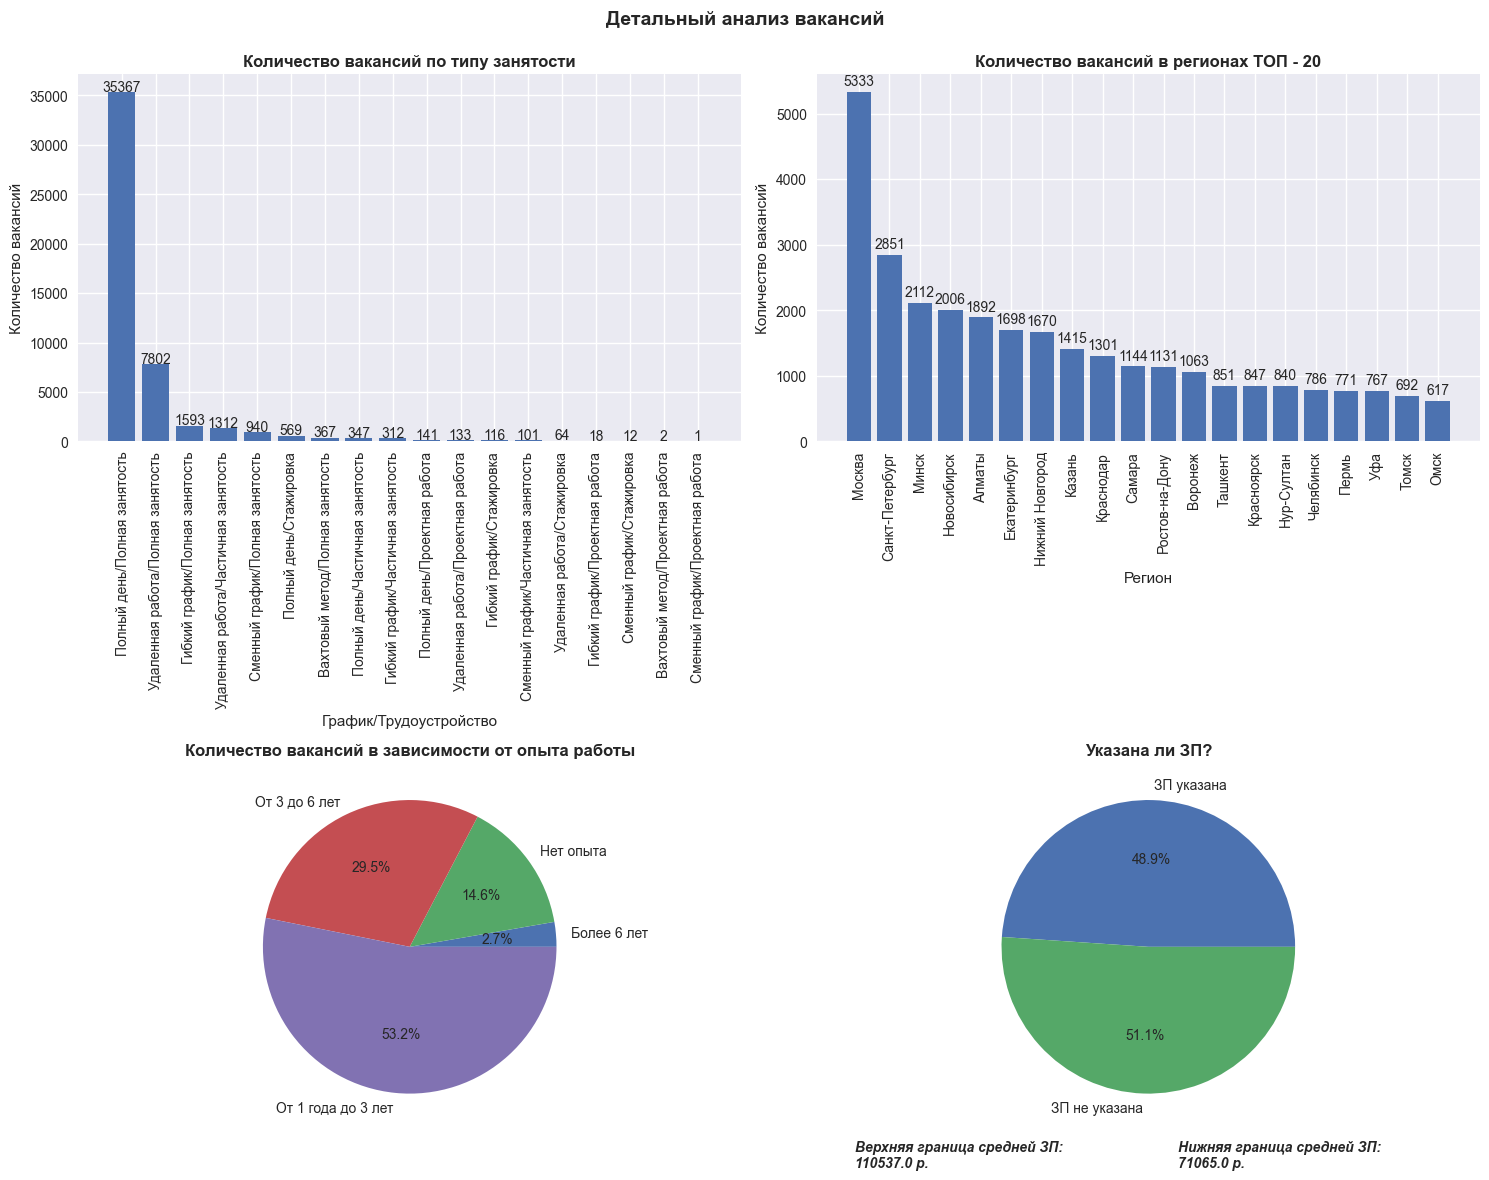

In [200]:
# выводы по детальному анализу вакансий

# Данные для первого bar chart
employment_data_x = schedule_employment['График/Трудоустройство'].to_list()
employment_data_y = schedule_employment['Количество вакансий'].to_list()

# Данные для второго bar chart
region_data = area_vacan['Регион'].to_list()[:20]
vacan_qty = area_vacan['Количество вакансий'].to_list()[:20]

# Данные для первого pie chart
experience_data = exp_info['Количество вакансий'].to_list()
experience_labels = exp_info['Требуемый опыт работы'].to_list()

# Данные для второго pie chart
salary_data = vacan_salaries['Количество вакансий'].to_list()
salary_labels = vacan_salaries['Указана ли ЗП?'].to_list()

# Создание subplot
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Детальный анализ вакансий\n', fontsize=14, fontweight='bold')

# Bar chart для Типа занятости
ax1 = axes[0, 0]
ax1.bar(employment_data_x, employment_data_y)
ax1.set_title("Количество вакансий по типу занятости", fontweight='bold')
ax1.set_ylabel("Количество вакансий")
ax1.set_xlabel("График/Трудоустройство")
ax1.tick_params(axis='x', rotation=90)
# добавляем значения к столбцам
for i, v in enumerate(employment_data_y):
    ax1.text(i, v + 100, str(v), ha='center')


# Bar chart для Регионов и вакансий
ax2 = axes[0, 1]
ax2.bar(region_data, vacan_qty)
ax2.set_title("Количество вакансий в регионах ТОП - 20", fontweight='bold')
ax2.set_ylabel("Количество вакансий")
ax2.set_xlabel("Регион")
ax2.tick_params(axis='x', rotation=90)
for i, v in enumerate(vacan_qty):
    ax2.text(i, v + 100, str(v), ha='center')

# Pie chart для Требуемого опыта работы и количества вакансий
ax3 = axes[1, 0]
ax3.pie(experience_data, labels=experience_labels, autopct='%1.1f%%')
ax3.set_title("Количество вакансий в зависимости от опыта работы", fontweight='bold')

# Pie chart для Указания ЗП (указана - не указана)
ax4 = axes[1, 1]
ax4.pie(salary_data, labels=salary_labels, autopct='%1.1f%%')
ax4.set_title("Указана ли ЗП?", fontweight='bold')
# добавляем текст для  обозначения зарплатной вилки
ax4.text(0.2, - 1.5,  f'Нижняя граница средней ЗП:\n{avg_salaries.loc[0][0]} р.', style='oblique', fontweight='bold')
ax4.text( - 2, - 1.5,  f'Верхняя граница средней ЗП:\n{avg_salaries.loc[0][1]} р.', style='oblique', fontweight='bold')

# Отобразить графики
plt.tight_layout()
plt.show()

Детальный анализ вакансий показывает, что основная масса предложений по работе приходится на самые крупные города РФ и ближнего зарубежья (в странах СНГ). В России территориально большинство вакансий сосредоточено в европейской части, если же говорить про Сибирь и Дальний Восток, то основное количество вакансий приходится на крупные города. В странах СНГ большинство работодателей предлагают работу в столицах и наиболее крупных городах (например, Алматы в Казахстане).

При рассмотрении количества вакансий в разрезе предагаемого графика и типа трудоустройства, становится понятным, что большинство работодателей до сих пор предпочитают классический подход, подразумевающий работу в офисе на полный рабочий день. Однако реалии последних лет (ковидные ограничения, а также мощное развитие различных средств связи) серьезно изменили отношение работодателей к альтернативным вариантам возможного трудоустройства, и на второе место выходит удаленная работа, хотя нужно отметить, что удаленная работа практически в 5 раз менее популярна среди работодателей, чем работа в офисе. Отдельно хотелось бы отметить достаточно малое количество предложений по стажировке - это свидетельствует о том, что очень многие работодатели все еще не готовы выращивать специалистов под себя, инвестируя время и средства в специалистов без опыта, и предпочитают искать готовых профессионалов. Здесь несомненно играет отрицательную роль и текущая экономическая ситуация, однако демографическая яма, дефицит нужных специалистов с опытом и несоответствие получаемых в учебных заведениях знаний реалиям производства рано или поздно заставят работодателей изменить свое мнение по стажировкам.

А пока что львиная доля вакансий требует наличие опыта (порядка 85% вакансий требуют наличие опыта от 1 года), и лишь 15% вакансий не содержат ограничений по опыту. При детальном рассмотрении требований к опыту становится понятным, что большинство работодателей заинтересованы в работниках с опытом от 1     года до 3 лет. Специалисты с таким опытом не столь дороги, как более опытные коллеги, уже обладают основными навыками работы, и их можно достаточно быстро и дешево доучить и ввести в курс дела. На втором месте находятся специалисты с опытом от 3 до 6 лет. В эту категорию попадают специалисты уровня миддл и сениор, претендующие на достаточно высокие зарплаты и позиции. Всего порядка 3% процентов вакансий требуют наличие опыта от 6 лет, и это видимо в большинстве своем руководящие должности или нишевые технические специалисты, от которых требуется глубокое знание предметной области, умение самостоятельно ставить и решать задачи, и наличие хорошо прокачанных hard и soft skills. Таких специалистов очень мало на рынке, они очень дорого стоят, что и отражает столь малая цифра предложений по работе.

Если говорить о наличии сведений о заработной плате в вакансиях, то стоит упомянуть, что половина вакансий не содержит такой информации. Это наталкивает на мысль, что многие работодатели специально не указывают зарплатную вилку, чтобы иметь больше простора для торга, справедливо полагая, что многие соискатели склонны занижать свои зарплатные ожидания, особенно молодые специлисты, готовые работать буквально за еду, чтобы получить необходимый практический опыт.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [201]:
# текст запроса
# в первом запросе выбираем самую первую строчку (limit 1), во втором - 5-ую (offset 4, limit 1)
query_5_1 = '''(select
                    e.name "Работодатель"                    
                from
                    public.vacancies v
                join 
                    public.employers e on e.id = v.employer_id
                group by 1
                order by count(v.id) desc
                limit 1)
                
                union all
                
                (select
                    e.name "Работодатель"                    
                from
                    public.vacancies v
                join 
                    public.employers e on e.id = v.employer_id
                group by 1
                order by count(v.id) desc
                offset 4
                limit 1)                
'''

In [202]:
# результат запроса
employer_info = pd.read_sql_query(query_5_1, connection)
display(employer_info)
answer = employer_info['Работодатель']
print('')
print(f'Работодатели, находящиеся на первом и пятом месте по количеству вакансий: {answer[0]} и {answer[1]}')


,Работодатель
0,Яндекс
1,Газпром нефть



Работодатели, находящиеся на первом и пятом месте по количеству вакансий: Яндекс и Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [203]:
# текст запроса
# втором запросе используем left join между таблицами areas and vacancies, чтобы определить, у каких регионов нет ни одной вакансии
query_5_2 = '''(select
                    a.name "Регион",
                    count(distinct v.employer_id) "Количество работодателей",
                    count(v.id) "Количество вакансий"                                       
                from
                    public.vacancies v
                join 
                    public.areas a on a.id = v.area_id
                group by a.id
                order by 2 desc)
                
                union all
                
                (select
                    a.name "Регион",
                    count(distinct e.id) "Количество работодателей",
                    count(v.id) "Количество вакансий"                                       
                from
                    public.areas a                    
                left join 
                    public.vacancies v on a.id = v.area_id
                join
                    public.employers e on a.id = e.area
                where v.id is null
                group by a.id
                order by 2 desc
                limit 1)             
'''

In [204]:
# результат запроса
employer_qty_area = pd.read_sql_query(query_5_2, connection)
answer = employer_qty_area[employer_qty_area['Количество вакансий'] == 0].iloc[0, 0]
display(employer_qty_area.head())
print(f'Регион с наибольшим количеством работодателей, и в котором нет вакансий: {answer}')
display(employer_qty_area.tail(1))


,Регион,Количество работодателей,Количество вакансий
0,Москва,2320,5333
1,Санкт-Петербург,1451,2851
2,Минск,851,2112
3,Новосибирск,802,2006
4,Алматы,798,1892


Регион с наибольшим количеством работодателей, и в котором нет вакансий: Россия


,Регион,Количество работодателей,Количество вакансий
769,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [205]:
# текст запроса
query_5_3 = ''' select
                    e.name "Работодатель",
                    count(distinct v.area_id) "Количество регионов"                                                          
                from
                    public.employers e                    
                join 
                    public.vacancies v on e.id = v.employer_id                
                group by e.id
                order by 2 desc                            
'''


In [206]:
# результат запроса
employer_area = pd.read_sql_query(query_5_3, connection)
answer = employer_area['Количество регионов'].max()
display(employer_area.head())
print('')
print(f'Максимальное количество регионов, где один работодатель разместил свои резюме, составляет: {answer}')

,Работодатель,Количество регионов
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71



Максимальное количество регионов, где один работодатель разместил свои резюме, составляет: 181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [207]:
# текст запроса
query_5_4 = ''' select
                    count(*) "Количество работодателей"                                                          
                from
                    public.employers e                    
                left join 
                    public.employers_industries i on e.id = i.employer_id
                where i.employer_id is null                                          
'''

In [208]:
# результат запроса
employer_without_indust = pd.read_sql_query(query_5_4, connection)
display(employer_without_indust)
answer = employer_without_indust['Количество работодателей'][0]
print(f'Количество работодателей, у которых не указана сфера деятельности: {answer}')

,Количество работодателей
0,8419


Количество работодателей, у которых не указана сфера деятельности: 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [209]:
# текст запроса
query_5_5 = ''' select
                    e.name,
                    count(i.industry_id) "Количество сфер деятельности"                                                          
                from
                    public.employers e                    
                join 
                    public.employers_industries i on e.id = i.employer_id
                group by 1
                having count(i.industry_id) = 4
                order by 1
                offset 2
                limit 1                                         
'''

In [210]:
# результат запроса
employer_indust_qty = pd.read_sql_query(query_5_5, connection)
answer = employer_indust_qty['name'][0]
print(f'Hазвание компании, находящейся на третьем месте в алфавитном списке (по названию) компаний,\nу которых указано четыре сферы деятельности: {answer}')

Hазвание компании, находящейся на третьем месте в алфавитном списке (по названию) компаний,
у которых указано четыре сферы деятельности: 2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [211]:
# текст запроса
# для получения данных объединяем 3 таблицы: employers, employers_industries, и industries
query_5_6 = ''' select
                    count(e.id) "Количество работодателей"                                                      
                from
                    public.employers e                    
                join 
                    public.employers_industries ei on e.id = ei.employer_id
                join
                    public.industries i on ei.industry_id = i.id
                where i.name like 'Разработка программного обеспечения'                                         
'''

In [212]:
# результат запроса
employer_indust_name = pd.read_sql_query(query_5_6, connection)
answer = employer_indust_name['Количество работодателей'][0]
print(f'Количество работодателей, у которых в качестве сферы \nдеятельности указана "Разработка программного обеспечения: {answer}')

Количество работодателей, у которых в качестве сферы 
деятельности указана "Разработка программного обеспечения: 3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [213]:
# код для получения списка городов-милионников - способ 1
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')
# в таблице на каждый город-миллионник имеется ссылка на отдельную статью, поэтому можем искать по тегу "а", и потом из этих ссылок вычленить текст,
# однако первые четыре строки будут относиться к ссылкам на статьи, не относящиеся к городам, поэтому для наших нужд берем значения начиная с пятого
rows = page.find('table', class_='standard sortable').find_all('a')[4:]
million_city_list = [row.text for row in rows]
print('Список городов - миллионников:\n\n', million_city_list)

Список городов - миллионников:

 ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [214]:
# код для получения списка городов-милионников - способ 2 (спарсил всю таблицу с википедии)
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')
# в переменную rows сохраняем строки таблицы, кроме первой, так как первая строка содержить имена колонок
rows = page.find('table', class_='standard sortable').find_all('tr')[1:]
columns = page.find('table', class_='standard sortable').find_all('tr')[0]


def extract_column_values(columns):
    """данная функция переводит значения, полученные с html страницы
    при помощи библиотеки BeatifulSoup в список строковых значений
    Используем эту функцию для получения имен колонок таблицы.

    Args:
        columns (list): список, состоящий из элементов BeatifulSoup

    Returns:
        list: возвращает список, состоящих из переведенных в текст элементов BeatifulSoup
    """
    data = [value for value in columns.find_all('th')]
    extacted_data = [i.text for i in data]
    return extacted_data

def extract_row_values(rows):
    """данная функция переводит значения, полученные с html страницы
    при помощи библиотеки BeatifulSoup в список строковых значений.
    Используем данную фунцию для получения значений строк таблицы.

    Args:
        columns (list): список, состоящий из элементов BeatifulSoup

    Returns:
        list: возвращает список, состоящих из переведенных в текст элементов BeatifulSoup
    """
    table_rows = []
    for row in rows:
        table_data = row.find_all('td')
        data = [value.text for value in table_data]
        table_rows.append(data)
    return table_rows

df_col_names = extract_column_values(columns)
df_rows = extract_row_values(rows)        
df_million_cities = pd.DataFrame(data = df_rows, columns = df_col_names)
df_million_cities = df_million_cities.drop('№', axis = 1) #убираем эту колонку, так как она дублирует значения индексов
display(df_million_cities.head(2))
print('Список городов - миллионников:\n\n', df_million_cities['Город'].to_list())

,Город,"Население, тыс. чел. (на 1 января 2023 года)","Население, тыс. чел. (итоги переписи 2021 года)[5]",Прирост относительно переписи-2010,"Население, тыс. чел.(итоги переписи 2010 года)[6]"
0,Москва,13 098,13 010,"13,1 %",11 504
1,Санкт-Петербург,5 598,5 602,"14,8 %",4 880


Список городов - миллионников:

 ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [215]:
# текст запроса
million_city_list = df_million_cities['Город'].to_list()

# в запросе прописываем условие, что название area находится в списке городов миллионников. 
# Данное выражение позволяет перевести список в кортеж: (*million_city_list, )
query_5_7 = f'''(select
                    a.name "Город",
                    count(v.id)  "Количество вакансий"                                                        
                from
                    public.areas a                    
                join 
                    public.vacancies v on a.id = v.area_id
                join
                    public.employers e on e.id = v.employer_id
                where
                    a.name in {(*million_city_list, )} 
                and
                    e.name = 'Яндекс'
                group by 1
                )
                    
                union all
                
                (select
                    'total',
                    count(v.id)                                                          
                from
                    public.areas a                    
                join 
                    public.vacancies v on a.id = v.area_id
                join
                    public.employers e on e.id = v.employer_id
                where
                    a.name in {(*million_city_list, )} 
                and
                    e.name = 'Яндекс'
                )
                order by 2
'''                

In [216]:
# результат запроса
cities_yandex = pd.read_sql_query(query_5_7, connection)
print('Города - миллионники, в которых размещены вакансии компании "Яндекс": \n')
display(cities_yandex)

Города - миллионники, в которых размещены вакансии компании "Яндекс": 



,Город,Количество вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

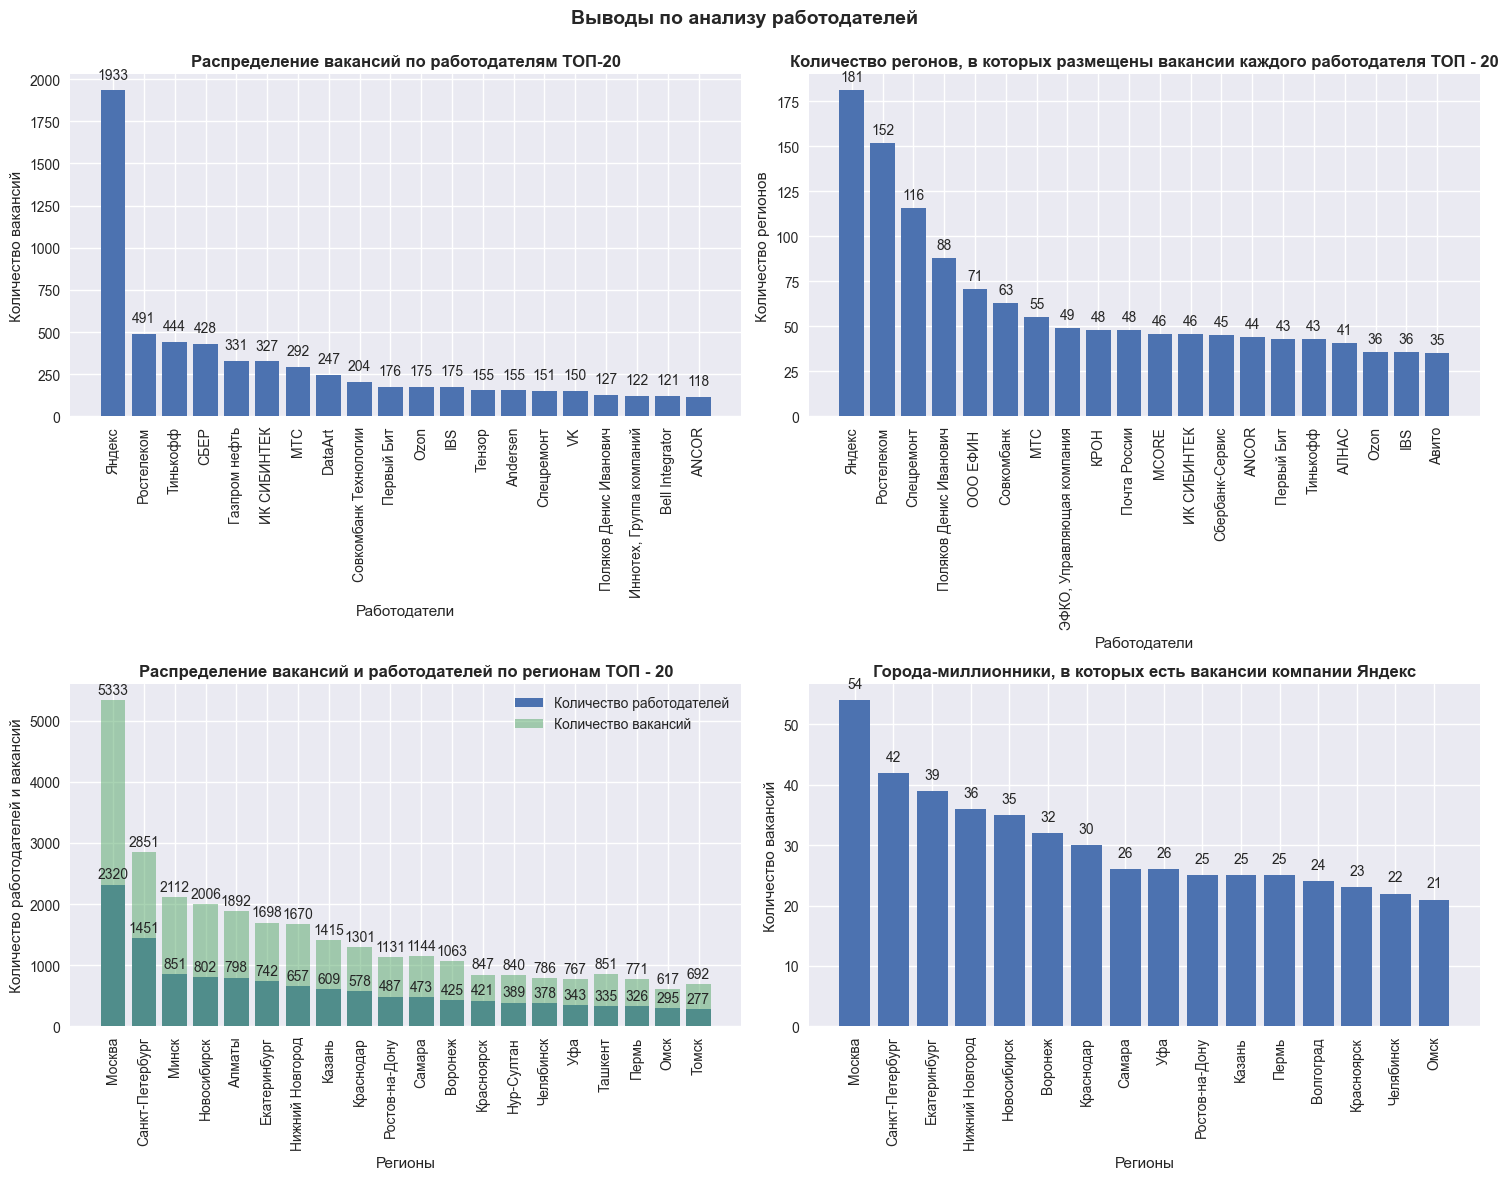

In [217]:
# выводы по анализу работодателей
# работодатели и количество вакансий
query_5_1 = '''select
                    e.name "Работодатель",
                    count(v.id) "Количество вакансий"                   
                from
                    public.vacancies v
                join 
                    public.employers e on e.id = v.employer_id
                group by 1
                order by count(v.id) desc
                                             
'''
employer_vac_qty = pd.read_sql_query(query_5_1, connection)

plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.suptitle('Выводы по анализу работодателей\n', fontsize=14, fontweight='bold')

# работодатели и количество вакансий
employer = employer_vac_qty['Работодатель'].to_list()[:20]
vacancies = employer_vac_qty['Количество вакансий'].to_list()[:20]
ax1 = axes[0, 0]
ax1.bar(employer, vacancies)
ax1.set_title("Распределение вакансий по работодателям ТОП-20", fontweight='bold')
ax1.set_ylabel("Количество вакансий")
ax1.set_xlabel("Работодатели")
ax1.tick_params(axis='x', rotation=90)
for i, v in enumerate(vacancies):
    ax1.text(i, v + 70, str(v), ha='center')

# регионы, вакансии и работодатели
regions = employer_qty_area['Регион'].to_list()[:20]
employers = employer_qty_area['Количество работодателей'].to_list()[:20]
vacancies = employer_qty_area['Количество вакансий'].to_list()[:20]
ax2 = axes[1, 0]
ax2.bar(regions, employers, label='Количество работодателей')
ax2.bar(regions, vacancies, label='Количество вакансий', alpha=0.5)
ax2.set_title("Распределение вакансий и работодателей по регионам ТОП - 20", fontweight='bold')
ax2.set_ylabel("Количество работодателей и вакансий")
ax2.set_xlabel("Регионы")
ax2.tick_params(axis='x', rotation=90)
ax2.legend()
for i, v in enumerate(employers):
    ax2.text(i, v + 100, str(v), ha='center')
for i, v in enumerate(vacancies):
    ax2.text(i, v + 100, str(v), ha='center')

# работодатели и регионы
employer = employer_area['Работодатель'].to_list()[:20]
regions_qty = employer_area['Количество регионов'].to_list()[:20]
ax3 = axes[0, 1]
ax3.bar(employer, regions_qty)
ax3.set_title("Количество регонов, в которых размещены вакансии каждого работодателя ТОП - 20", fontweight='bold')
ax3.set_ylabel("Количество регионов")
ax3.set_xlabel("Работодатели")
ax3.tick_params(axis='x', rotation=90)
for i, v in enumerate(regions_qty):
    ax3.text(i, v + 5, str(v), ha='center')
 
# Города-миллионники, в которых есть вакансии компании Яндекс   
city = cities_yandex['Город'].to_list()[15::-1]
city_vac = cities_yandex['Количество вакансий'].to_list()[15::-1]
ax4 = axes[1, 1]
ax4.bar(city, city_vac)
ax4.set_title("Города-миллионники, в которых есть вакансии компании Яндекс", fontweight='bold')
ax4.set_ylabel("Количество вакансий")
ax4.set_xlabel("Регионы")
ax4.tick_params(axis='x', rotation=90)
for i, v in enumerate(city_vac):
    ax4.text(i, v + 2, str(v), ha='center')

# Отобразить графики
plt.tight_layout()
plt.show()


 - Основные игроки на рынке: Анализ показывает, что наибольшее количество вакансий размещается крупнейшими компаниями России, причем большинство из них относится к IT-сектору и финансовой отрасли. Это указывает на значительный рост и важность этих секторов в экономике страны. Компании, такие как Яндекс, СБЕР, МТС и другие, играют ключевую роль в формировании рынка труда и могут влиять на тенденции в нем.
 - Динамика развития IT-сектора: Важным фактором является активное развитие IT-сектора, требующее постоянного пополнения кадров. Рост количества вакансий в этой области может быть связан с увеличением числа цифровых продуктов и услуг, а также с технологическими инновациями, которые требуют специалистов для их разработки и поддержки.
 - Тренд удаленной работы: Указывается на увеличение популярности удаленной работы, особенно в IT-компаниях. Это может быть связано с технологическими возможностями, которые позволяют работать из любой точки, а также с экономическими факторами, когда компании могут искать специалистов за пределами традиционных регионов.
 - География размещения вакансий: Компании размещают вакансии в разных регионах, что может быть обусловлено различными факторами, такими как уровень зарплат в регионах, уровень требовательности кандидатов, а также тенденция к удаленной работе. Это также связано с появлением новых центров разработки за преде
 - Проблема недостаточной информации: Однако в анализе также выявляется проблема, связанная с недостаточной информацией, предоставляемой работодателями. Треть компаний не указывают свою сферу деятельности, что может создать затруднения для соискателей. Это может снижать эффективность процесса подбора персонала и приводить к непониманию, соответствует ли данная вакансия потребностям соискателя.

Таким образом, анализ подчеркивает сложившуюся ситуацию на рынке труда, где определенные отрасли, такие как IT и финансы, играют важную роль. Однако недостаток информации со стороны работодателей может стать препятствием для эффективного взаимодействия между соискателями и компаниями. Для улучшения ситуации важно стимулировать компании предоставлять более полную и четкую информацию о себе и о вакансиях, что способствует более качественному подбору персонала и создает благоприятное впечатление о компании среди потенциальных соискателей. 

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [218]:
# текст запроса
vac_to_search = ['%data%', '%данн%']
query_6_1 = f'''select
                    'Вакансии, имеющие отношения к данным' "Тип вакансии",
                    count(v.id) "Количество вакансий"                                                      
                from
                    public.vacancies v                       
                where 
                    v.name ilike any (array{vac_to_search})  
                
                union all
                
                select
                    'Прочие вакансии',
                    count(v.id) "Количество вакансий"                                                      
                from
                    public.vacancies v                       
                where 
                    v.name not ilike any (array{vac_to_search})                                                        
'''


In [219]:
# результат запроса
data_vacancies = pd.read_sql_query(query_6_1, connection)
answer = data_vacancies['Количество вакансий'][0]
display(data_vacancies)
print('')
print(f'Количество вакансий, имеющих отношения к данным: {answer}')

,Тип вакансии,Количество вакансий
0,"Вакансии, имеющие отношения к данным",1771
1,Прочие вакансии,49120



Количество вакансий, имеющих отношения к данным: 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [220]:
# текст запроса
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_2 = f'''select
                    'Вакансии для начианающих дата-сайнтистов' "Тип вакансии",
                    count(*) "Количество вакансий"                                                    
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and    
                    (v.name ilike '%junior%' or v.experience = 'Нет опыта' or v.employment = 'Стажировка')
                    
                union all
                
                select
                    'Вакансии для middle и senior дата-сайнтистов',
                    count(*) "Количество вакансий"                                                    
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and    
                    (v.name not ilike '%junior%' and v.experience != 'Нет опыта' and v.employment != 'Стажировка')                                  
'''

In [221]:
# результат запроса
ds_vacancies_count = pd.read_sql_query(query_6_2, connection)
display(ds_vacancies_count)
answer = ds_vacancies_count['Количество вакансий'][0]
print('')
print(f'Количество вакансий, подходящие начинающим дата-сайнтистам: {answer}')

,Тип вакансии,Количество вакансий
0,Вакансии для начианающих дата-сайнтистов,51
1,Вакансии для middle и senior дата-сайнтистов,429



Количество вакансий, подходящие начинающим дата-сайнтистам: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [222]:
# текст запроса
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_3 = f'''select
                    'Ключевые навыки: SQL и postgres' "Ключевые навыки",
                    count(*) "Количество вакансий"                                                    
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and    
                    v.key_skills ilike any (array['%SQL%', '%postgres%'])  
                
                union all
                
                select
                    'Прочие навыки',
                    count(*) "Количество вакансий"                                                    
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and    
                    v.key_skills not ilike all (array['%SQL%', '%postgres%'])                                   
'''

In [223]:
# результат запроса
ds_vacancies_count_sql = pd.read_sql_query(query_6_3, connection)
display(ds_vacancies_count_sql)
answer = ds_vacancies_count_sql['Количество вакансий'][0]
print('')
print(f'Количество вакансий, в которых в качестве ключевого навыка указан SQL или postgres: {answer}')

,Ключевые навыки,Количество вакансий
0,Ключевые навыки: SQL и postgres,201
1,Прочие навыки,230



Количество вакансий, в которых в качестве ключевого навыка указан SQL или postgres: 201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [224]:
# текст запроса
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_4 = f'''select
                    'Ключевые навыки: Python' "Ключевые навыки",
                    count(*) "Количество вакансий"                                                    
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and    
                    v.key_skills ilike '%python%'
                
                union all
                
                select
                    'Прочие навыки',
                    count(*) "Количество вакансий"                                                    
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and    
                    v.key_skills not ilike '%python%'
'''

In [225]:
# результат запроса
ds_vacancies_count_python = pd.read_sql_query(query_6_4, connection)
display(ds_vacancies_count_python)
answer = ds_vacancies_count_python['Количество вакансий'][0]
print('')
print(f'Количество вакансий, в которых в качестве ключевого навыка указан Python: {answer}')

,Ключевые навыки,Количество вакансий
0,Ключевые навыки: Python,351
1,Прочие навыки,80



Количество вакансий, в которых в качестве ключевого навыка указан Python: 351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [226]:
# текст запроса
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_5 = f'''select
                    avg(length(v.key_skills) - length(replace(v.key_skills, chr(9), '')) + 1)::numeric(3, 2) "Навыки"                                   
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and
                    v.key_skills is not null
'''

query_6_5_1 = f'''select
                    (length(v.key_skills) - length(replace(v.key_skills, chr(9), '')) + 1) "Количество навыков DS",
                    count(*) "Количество вакансий"                                    
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and
                    v.key_skills is not null
                group by
                    1
                order by 2 desc
'''                    
   

In [227]:
# результат запроса
ds_avg_skills = pd.read_sql_query(query_6_5, connection)
answer = ds_avg_skills['Навыки'][0]
print(f'Среднее количество навыков, которые указывают в вакансиях для DS: {answer}')

ds_vac_skills_qty = pd.read_sql_query(query_6_5_1, connection)
display(ds_vac_skills_qty.head())


Среднее количество навыков, которые указывают в вакансиях для DS: 6.41


,Количество навыков DS,Количество вакансий
0,5,146
1,6,68
2,4,34
3,8,33
4,9,28


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [228]:
# текст запроса
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_6 = f'''select
                    v.experience "Опыт работы",                                        
                    round(avg((coalesce(salary_from, 0, null) + coalesce(salary_to, 0, null)) / (coalesce(salary_from, 0, null) / coalesce(salary_from, 1, null) + coalesce(salary_to, 0, null)/ coalesce(salary_to, 1, null)))) "Средняя ЗП" 
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and
                    (salary_from is not null or salary_to is not null)
                group by v.experience
'''



In [229]:
# результат запроса
ds_avg_salary = pd.read_sql_query(query_6_6, connection) 
display(ds_avg_salary)
print('')
answer = ds_avg_salary['Средняя ЗП'][2]
print(f'Средняя зарплата, на которую может рассчитывать дата-сайнтист с опытом от 3 до 6 лет составляет: {answer} р.')


,Опыт работы,Средняя ЗП
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0



Средняя зарплата, на которую может рассчитывать дата-сайнтист с опытом от 3 до 6 лет составляет: 243115.0 р.


***

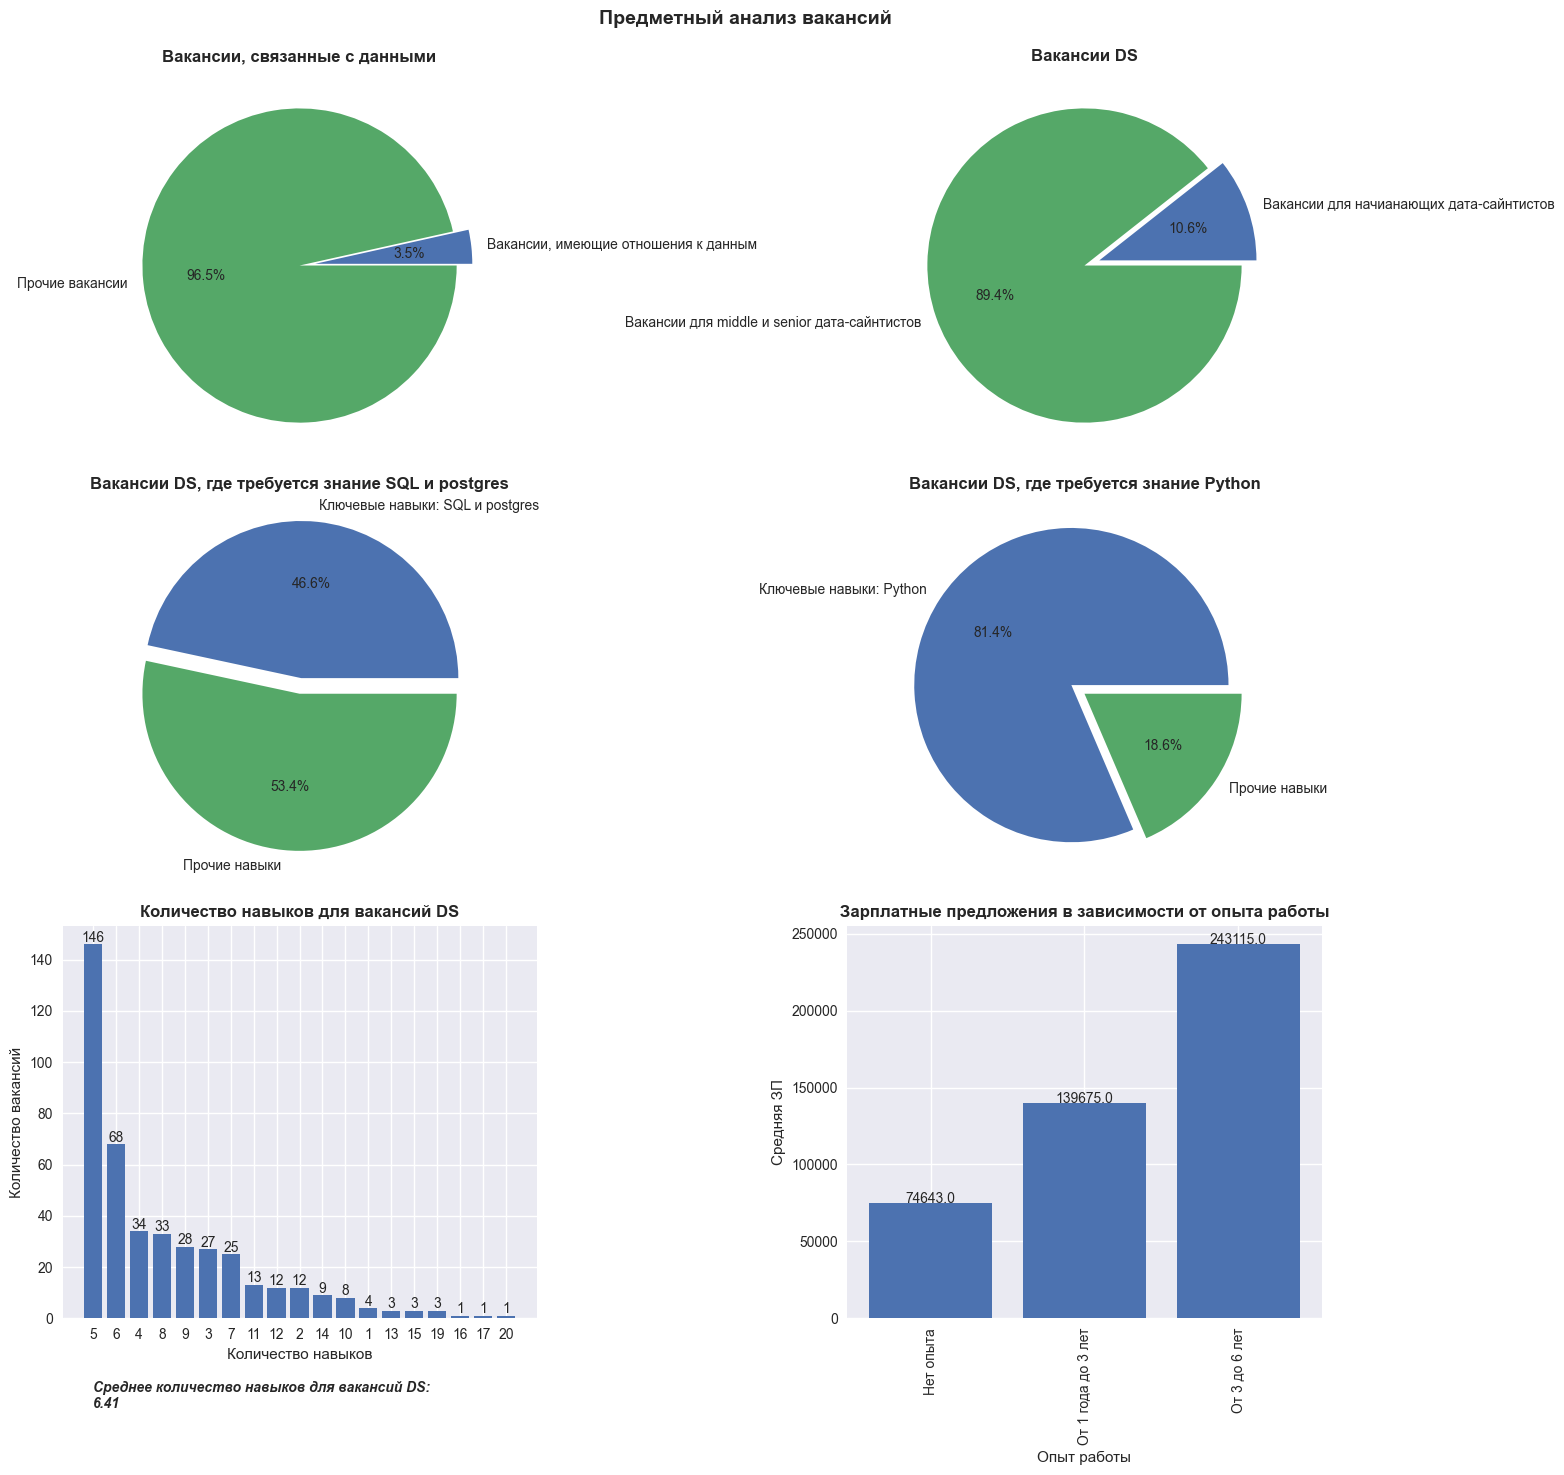

In [230]:
# выводы по предметному анализу

# Данные для первого pie chart
data_vacancies_data = data_vacancies['Количество вакансий'].to_list()
data_vacancies_labels= data_vacancies['Тип вакансии'].to_list()

# Данные для второго pie chart
ds_vacancies_count_data = ds_vacancies_count['Количество вакансий'].to_list()
ds_vacancies_count_labels = ds_vacancies_count['Тип вакансии'].to_list()

# Данные для третьго pie chart
ds_vacancies_count_sql_data = ds_vacancies_count_sql['Количество вакансий'].to_list()
ds_vacancies_count_sql_labels = ds_vacancies_count_sql['Ключевые навыки'].to_list()

# Данные для четвертого pie chart
ds_vacancies_count_python_data = ds_vacancies_count_python['Количество вакансий'].to_list()
ds_vacancies_count_python_labels = ds_vacancies_count_python['Ключевые навыки'].to_list()

# Данные для пятого pie chart
ds_vac_skills_qty_y = ds_vac_skills_qty['Количество вакансий'].to_list()
ds_vac_skills_qty_x = ds_vac_skills_qty['Количество навыков DS'].astype('str').to_list()

# Данные для шестого pie chart
ds_avg_salary_y = ds_avg_salary['Средняя ЗП'].to_list()
ds_avg_salary_x = ds_avg_salary['Опыт работы'].to_list()

# Создание subplot
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Предметный анализ вакансий\n', fontsize=14, fontweight='bold')

# Pie chart Вакансии, связанные с данными
ax1 = axes[0, 0]
ax1.pie(data_vacancies_data, labels=data_vacancies_labels, autopct='%1.1f%%', explode=(0.1 , 0))
ax1.set_title("Вакансии, связанные с данными", fontweight='bold')

# Pie chart Вакансии DS
ax2 = axes[0, 1]
ax2.pie(ds_vacancies_count_data, labels=ds_vacancies_count_labels, autopct='%1.1f%%', explode=(0.1 , 0))
ax2.set_title("Вакансии DS", fontweight='bold')

# Pie chart Вакансии DS, где требуется знание SQL и postgres
ax3 = axes[1, 0]
ax3.pie(ds_vacancies_count_sql_data, labels=ds_vacancies_count_sql_labels, autopct='%1.1f%%', explode=(0.1 , 0))
ax3.set_title("Вакансии DS, где требуется знание SQL и postgres", fontweight='bold')

# Pie chart Вакансии DS, где требуется знание Python
ax4 = axes[1, 1]
ax4.pie(ds_vacancies_count_python_data, labels=ds_vacancies_count_python_labels, autopct='%1.1f%%', explode=(0.1 , 0))
ax4.set_title("Вакансии DS, где требуется знание Python", fontweight='bold')

# barplot Количество навыков для вакансий DS
text = ds_avg_skills['Навыки'][0]
ax5 = axes[2, 0]
ax5.bar(ds_vac_skills_qty_x, ds_vac_skills_qty_y)
ax5.set_title("Количество навыков для вакансий DS", fontweight='bold')
ax5.set_ylabel("Количество вакансий")
ax5.set_xlabel("Количество навыков")
for i, v in enumerate(ds_vac_skills_qty_y):
    ax5.text(i, v + 1, str(v), ha='center')
ax5.text(0, -35,  f'Среднее количество навыков для вакансий DS:\n{text}', style='oblique', fontweight='bold')

# barplot Зарплатные предложения в зависимости от опыта работы
ax6 = axes[2, 1]
ax6.bar(ds_avg_salary_x, ds_avg_salary_y)
ax6.set_title("Зарплатные предложения в зависимости от опыта работы", fontweight='bold')
ax6.set_ylabel("Средняя ЗП")
ax6.set_xlabel("Опыт работы")
ax6.tick_params(axis='x', rotation=90)
for i, v in enumerate(ds_avg_salary_y):
    ax6.text(i, v + 10, str(v), ha='center')


# Отобразить графики
plt.tight_layout()
plt.show()

 - Тип вакансии: В анализируемой выборке большая часть вакансий (49120 из 51291) относится к "Прочим вакансиям", тогда как вакансии, имеющие отношение к данным, составляют менее 4% от общего числа. Видимо, рынок вакансий для специалистов по работе с данными все еще не сформировался, и в дальнешем его ждет значительный рост.
 - Типы вакансий для дата-сайнтистов: Вакансии для middle и senior дата-сайнтистов составляют значительную часть (429 из 480) всех вакансий для данной категории специалистов. Это может свидетельствовать о том, что компании ищут опытных специалистов с глубокими знаниями и навыками в области анализа данных.
 - Ключевые навыки: Среди ключевых навыков, которые указывают в вакансиях для дата-сайнтистов, наиболее популярными являются SQL и Python. Это подтверждает значимость знаний в области баз данных и программирования для работы с данными.
 - Количество навыков DS: Большинство вакансий требует наличие примерно 6-7 ключевых навыков для дата-сайнтистов. Это может указывать на широкий спектр обязанностей, связанных с анализом данных, и потребность в многогранном наборе навыков.
 - Опыт работы и ЗП: Зависимость между опытом работы и зарплатой видна из представленных данных. Чем больше опыта у дата-сайнтиста, тем выше средняя зарплата. Наиболее высокая средняя зарплата (243115.0 р.) наблюдается у специалистов с опытом от 3 до 6 лет. Следует отметить отсутствие в вакансиях требования к опыту более 6 лет - видимо, таких специалистов просто нет на рынке, так как направление дата сайнс достаточно новое, и большинство специалистов просто не успели получить такой опыт.

Обобщая, можно сказать, что в рыночной среде данных вакансии для middle и senior дата-сайнтистов имеют большую долю среди всех предложений. Требуемые навыки включают знание SQL и Python, а также, вероятно, другие технологии и инструменты, связанные с обработкой и анализом данных. С опытом работы растет и уровень зарплаты, и наиболее оплачиваемыми считаются специалисты с опытом от 3 до 6 лет.

# Общий вывод по проекту

In [231]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

# дополнительное исследование  - выведем все данные по зарплатами DS и сделаем коробчатые диаграммы. 
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_4_3_1 = f'''select
                    v.salary_from "Нижняя граница ЗП DS",
                    v.salary_to "Верхняя граница ЗП DS"
                from
                    public.vacancies v
                where
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
'''

# дополнительное исследование - проверим, какая средняя зарплата у каждого сочетания графика/трудоустройства DS
query_4_4_1 = f'''select                    
                    schedule || '/' || employment "График/Трудоустройство",
                    round(avg((coalesce(salary_from, 0, null) + coalesce(salary_to, 0, null)) / (coalesce(salary_from, 0, null) / coalesce(salary_from, 1, null) + coalesce(salary_to, 0, null)/ coalesce(salary_to, 1, null)))) "Средняя ЗП DS" 
                from
                    public.vacancies v
                where 
                    (v.salary_from is not null or v.salary_to is not null)
                and 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                group by schedule, employment
                order by 2 desc 
'''

# дополнительные исследования - выяснить, в каких регионах предлагают работать дата сайнтистам и сколько там есть вакансий
query_5_2_3 = f'''select
                    a.name "Регион",
                    count(v.id) "Количество вакансий DS"                                       
                from
                    public.vacancies v
                join 
                    public.areas a on a.id = v.area_id
                where
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                group by 1
                order by count(v.id) desc
'''

# дополнительные исследования - выведем также среднюю ЗП по каждому региону с наибольшим количеством вакансий DS
query_5_2_1 = f'''select
                    a.name "Регион",
                    round(avg((coalesce(salary_from, 0, null) + coalesce(salary_to, 0, null)) / (coalesce(salary_from, 0, null) / coalesce(salary_from, 1, null) + coalesce(salary_to, 0, null)/ coalesce(salary_to, 1, null)))) "Средняя ЗП"                                        
                from
                    public.vacancies v
                join 
                    public.areas a on a.id = v.area_id
                where
                    (v.salary_from is not null or v.salary_to is not null)
                and 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                group by a.id
                order by count(v.id) desc
'''

# дополнительные исследования - выяснить, в каких компаниях предлагают работать дата сайнтистам
query_6_2_1 = f'''select
                    e.name "Компания",
                    count(*) "Количество вакансий DS"                                                    
                from
                    public.vacancies v
                join
                    public.employers e on v.employer_id = e.id                          
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                group by 1
                order by 2 desc
'''

# дополнительные исследования  - разброс зарплат DS для каждого уровня опыта
query_6_6_1 = f'''select
                    v.experience "Опыт работы",                                        
                    (coalesce(salary_from, 0, null) + coalesce(salary_to, 0, null)) / (coalesce(salary_from, 0, null) / coalesce(salary_from, 1, null) + coalesce(salary_to, 0, null)/ coalesce(salary_to, 1, null)) "ЗП" 
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and
                    (v.salary_from is not null or v.salary_to is not null)
'''
salaries_df = pd.read_sql_query(query_4_3_1, connection)
salary_employment = pd.read_sql_query(query_4_4_1, connection)
area_ds_vacan = pd.read_sql_query(query_5_2_3, connection)
area_salary = pd.read_sql_query(query_5_2_1, connection)
ds_vacancies_industries = pd.read_sql_query(query_6_2_1, connection)
ds_salary_exp = pd.read_sql_query(query_6_6_1, connection) 

#print('Зарплаты в DS (верхняя - нижняя границы):')
#display(salaries_df.head(3))
#print()
#print('Зарплаты в DS в зависимости от графика/типа трудоустройства:')
#display(salary_employment)
#print()
#print('Количество вакансий DS в регионах')
#display(area_ds_vacan.head(3))
#print()
#print('Средние ЗП DS в регионах (регионы расположены по количеству вакансий):')
#display(area_salary.head(3))
#print()
#print('Работодатели, предлагающие вакансии DS и количество вакансий')
#display(ds_vacancies_industries.head(3))
#print()
#print('Зарплаты в DS в зависимости от опыта работы')
#display(ds_salary_exp.head(3))

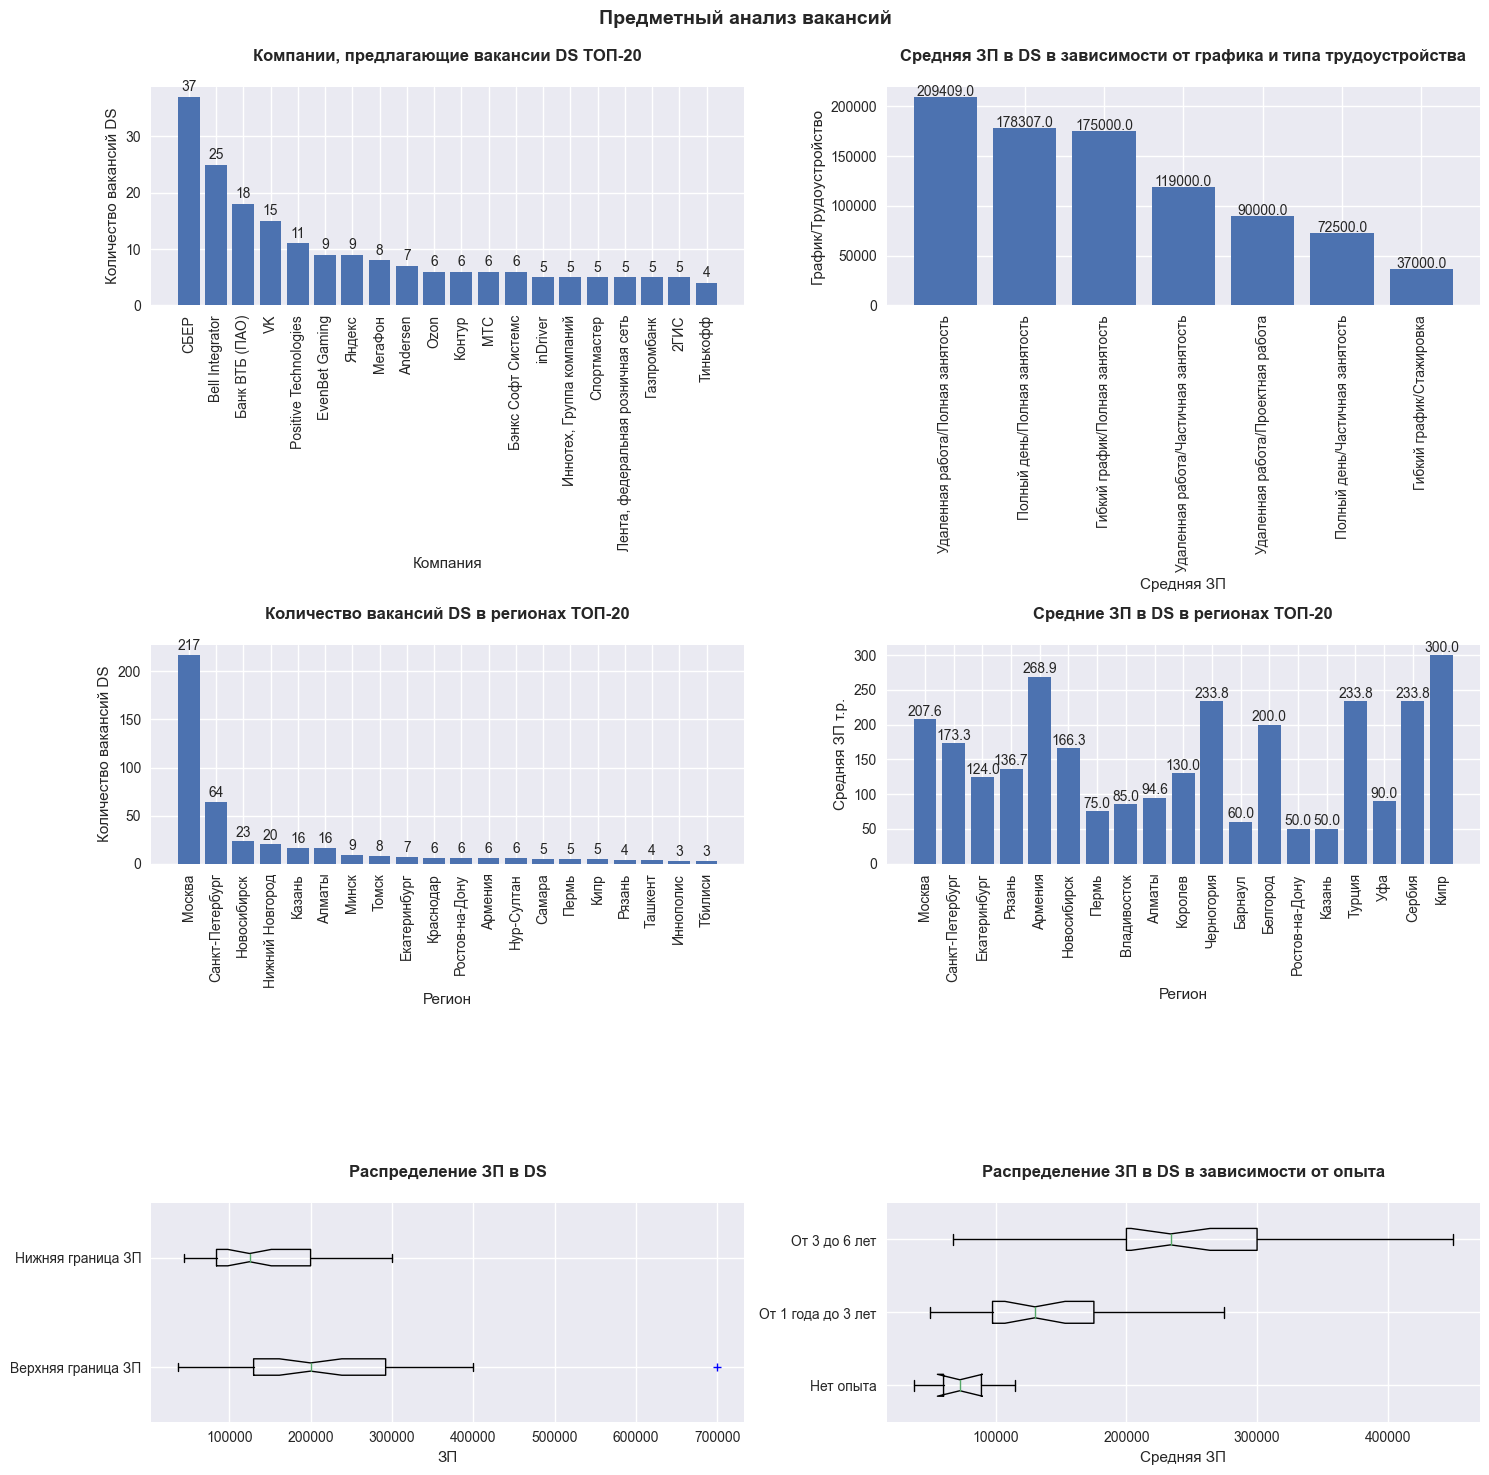

In [232]:
# Создание subplot
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Предметный анализ вакансий\n', fontsize=14, fontweight='bold')

# bar plot Компании, предлагающие вакансии DS ТОП-20
ds_vacancies_industries_x = ds_vacancies_industries['Компания'].to_list()[:20]
ds_vacancies_industries_y = ds_vacancies_industries['Количество вакансий DS'].to_list()[:20]
ax1 = axes[0, 0]
ax1.bar(ds_vacancies_industries_x, ds_vacancies_industries_y)
ax1.set_title("Компании, предлагающие вакансии DS ТОП-20\n", fontweight='bold')
ax1.set_ylabel("Количество вакансий DS")
ax1.set_xlabel("Компания")
ax1.tick_params(axis='x', rotation=90)
for i, v in enumerate(ds_vacancies_industries_y):
    ax1.text(i, v + 1, str(v), ha='center')

# bar plot Средняя ЗП в DS в зависимости от графика и типа трудоустройства
salary_employment_x = salary_employment['График/Трудоустройство'].to_list()
salary_employment_y = salary_employment['Средняя ЗП DS'].to_list()
ax2 = axes[0, 1]
ax2.bar(salary_employment_x, salary_employment_y)
ax2.set_title("Средняя ЗП в DS в зависимости от графика и типа трудоустройства\n", fontweight='bold')
ax2.set_ylabel("График/Трудоустройство")
ax2.set_xlabel("Средняя ЗП")
ax2.tick_params(axis='x', rotation=90)
for i, v in enumerate(salary_employment_y):
    ax2.text(i, v + 1000, str(v), ha='center')


# bar plot Количество вакансий DS в регионах ТОП-20
area_ds_vacan_x = area_ds_vacan['Регион'].to_list()[:20]
area_ds_vacan_y = area_ds_vacan['Количество вакансий DS'].to_list()[:20]
ax3 = axes[1, 0]
ax3.bar(area_ds_vacan_x, area_ds_vacan_y)
ax3.set_title("Количество вакансий DS в регионах ТОП-20\n", fontweight='bold')
ax3.set_ylabel("Количество вакансий DS")
ax3.set_xlabel("Регион")
ax3.tick_params(axis='x', rotation=90)
for i, v in enumerate(area_ds_vacan_y):
    ax3.text(i, v + 5, str(v), ha='center')

# bar plot Средние ЗП в DS в регионах ТОП-20
area_salary_x = area_salary["Регион"].to_list()[:20]
area_salary_y = (area_salary['Средняя ЗП'] / 1000).round(1).to_list()[:20]
ax4 = axes[1, 1]
ax4.bar(area_salary_x, area_salary_y)
ax4.set_title("Средние ЗП в DS в регионах ТОП-20\n", fontweight='bold')
ax4.set_ylabel("Средняя ЗП т.р.")
ax4.set_xlabel("Регион")
ax4.tick_params(axis='x', rotation=90)
for i, v in enumerate(area_salary_y):
    ax4.text(i, v + 5, str(v), ha='center')

# box plot для распределения зарплат DS
ax5 = axes[2, 0]
ax5.boxplot([salaries_df['Верхняя граница ЗП DS'].dropna().to_list(), salaries_df['Нижняя граница ЗП DS'].dropna().to_list()], labels=['Верхняя граница ЗП', 'Нижняя граница ЗП'], vert=False, notch=True, sym="b+")
ax5.set_title('Распределение ЗП в DS\n', fontweight='bold')
ax5.set_xlabel('ЗП')
#ax2.text(0, -35,  f'Среднее количество навыков для вакансий DS:\n{text}', style='oblique', fontweight='bold')

# box plot для распределения зарплат DS в зависимости от опыта
data1 = ds_salary_exp[ds_salary_exp['Опыт работы'] == 'Нет опыта']['ЗП']
data2 = ds_salary_exp[ds_salary_exp['Опыт работы'] == 'От 1 года до 3 лет']['ЗП']
data3 = ds_salary_exp[ds_salary_exp['Опыт работы'] == 'От 3 до 6 лет']['ЗП']
data = [data1, data2, data3]
ax6 = axes[2, 1]
ax6.boxplot(data, labels=['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет'], vert=False, notch=True, sym="b+")
ax6.set_title('Распределение ЗП в DS в зависимости от опыта\n', fontweight='bold')
ax6.set_xlabel('Средняя ЗП')
#ax2.text(0, -35,  f'Среднее количество навыков для вакансий DS:\n{text}', style='oblique', fontweight='bold')


# Отобразить графики
plt.tight_layout()
plt.show()

 Исходя из дополнительных данных, можно сделать следующие более развернутые выводы: 
 - Сферы компаний: Большинство компаний, предлагающих вакансии для дата-сайнтистов, представлены в сферах ИТ (например, Яндекс, VK), финансов (СБЕР, Газпромбанк, Тинькофф), розничной торговли (Ozon, Спортмастер, Лента) и телекоммуникаций (МТС, Ростелеком). Это свидетельствует о важности анализа данных в современных технологических, финансовых и коммерческих сферах.
 - Зарплаты в зависимости от графика/типа трудоустройства: Разброс зарплат в зависимости от типа трудоустройства указывает на влияние факторов гибкости графика и удаленной работы на уровень оплаты труда. Удаленная работа с полной занятостью обеспечивает самые высокие средние зарплаты, что может быть связано с высоким спросом на специалистов с аналитическими навыками, которые могут эффективно работать на удаленке.
 - Количество вакансий DS в регионах: Большинство вакансий для дата-сайнтистов предоставляются в крупных городах, таких как Москва и Санкт-Петербург. Это может быть обусловлено наличием развитой инфраструктуры и бизнес-среды, которая требует анализа данных для оптимизации деятельности.
 - Средние зарплаты DS в регионах: Средние зарплаты в регионах следуют за количеством вакансий. В Москве и Санкт-Петербурге, где наибольшее количество вакансий, также наблюдаются более высокие средние зарплаты. Это может быть обусловлено более высокой конкуренцией за специалистов и высокими стоимостями жизни в этих городах.
 - Зарплаты в DS в зависимости от опыта работы: Рост зарплат в зависимости от опыта работы является закономерным. Более опытные специалисты в DS ценятся выше и зарабатывают значительно больше. Это может быть связано с их способностью решать более сложные задачи, иметь более широкий набор навыков и значительный вклад в бизнес-процессы компаний.
 - Зарплатные диапазоны в DS: Зарплатные диапазоны для дата-сайнтистов выше, чем в среднем по всем вакансиям, что свидетельствует о значимости и востребованности данной специальности. Медианные и квартильные значения зарплат подчеркивают, что возможности заработка в DS могут быть достаточно высокими, особенно для опытных специалистов.

В целом, данные подчеркивают важность анализа данных в современной бизнес-среде, спрос на специалистов в этой области и влияние различных факторов, таких как опыт, регион и тип трудоустройства, на уровень оплаты труда для дата-сайнтистов.

Общие выводы:

 - Распределение вакансий неравномерно как среди регионов, так и среди работодателей. Наибольшее количество вакансий концентрируется в крупных городах и столицах, в то время как небольшие города часто выступают как поставщики рабочей силы для больших центров.
 - Большинство работодателей предпочитают традиционную форму трудоустройства - работу в офисе на полный рабочий день. Однако последние события, включая пандемию и развитие средств связи, сделали удаленную работу более популярной, хотя она все равно остается менее распространенной.
 - Предложения о стажировках ограничены, что свидетельствует о том, что многие работодатели предпочитают готовых специалистов с опытом, вместо того чтобы инвестировать в обучение начинающих специалистов. Тем не менее, текущие экономические и демографические факторы могут привести к изменению этой тенденции в будущем.
 - Опыт работы играет важную роль при подборе кандидатов. Большинство вакансий требуют опыта от 1 года до 3 лет. Специалисты с опытом от 3 до 6 лет также востребованы. Вакансии, требующие более продолжительного опыта (от 6 лет), ограничены, но они обычно связаны с высококвалифицированными руководящими или специализированными позициями.
 - Существует дефицит специалистов с глубоким опытом, особенно тех, кто обладает как техническими навыками, так и хорошо развитыми мягкими навыками. 
 - Распределение вакансий и требований к опыту различается в зависимости от региона и типа трудоустройства, что может быть обусловлено разными экономическими условиями и потребностями на рынке труда.
 - Дополнительные данные, такие как требования к образованию, знание иностранных языков и гражданство, могут быть полезными для более детального анализа вакансий и подготовки кадровой стратегии.
 - Недостаток информации о заработной плате в вакансиях может свидетельствовать о стратегии работодателей оставить пространство для торга и извлечь выгоду из заниженных зарплатных ожиданий соискателей, особенно у молодых специалистов.
 - Крупные компании, особенно в IT-секторе и финансовой отрасли, играют ключевую роль на рынке труда, указывая на значительный рост и важность этих секторов в экономике страны.
 - Развитие IT-сектора требует постоянного пополнения кадров из-за роста числа цифровых продуктов и услуг, а также инноваций, способствующих созданию и поддержке новых технологий.
 - Удаленная работа становится более популярной, особенно в IT-сфере, благодаря технологическим возможностям и экономическим факторам.
 - Распределение вакансий по регионам может быть обусловлено различными факторами, такими как уровень зарплат, требовательность кандидатов и тенденция к удаленной работе.
 - Недостаток информации о сфере деятельности компаний может затруднять процесс подбора персонала и создавать путаницу у соискателей.
 - Роль определенных отраслей: IT и финансовые секторы играют важную роль на рынке труда, отражая их рост и важность в экономике.
 - Нехватка информации: Недостаток информации со стороны работодателей о зарплате и других аспектах может затруднить взаимодействие между соискателями и компаниями, и важно стимулировать предоставление более полной и четкой информации.
 - Развитие рынка данных: Вакансии для дата-сайнтистов сосредоточены на средних и старших позициях, что может свидетельствовать о необходимости опытных специалистов в этой области.
 - Ключевые навыки: SQL и Python являются наиболее востребованными навыками для дата-сайнтистов, отражая значимость баз данных и программирования в работе с данными.
 - Широкий набор навыков: Требования к дата-сайнтистам включают примерно 6-7 ключевых навыков, что указывает на многогранность задач в области анализа данных.
 - Опыт работы и зарплата: Опыт работы оказывает влияние на уровень зарплаты, и наиболее высокие средние зарплаты наблюдаются у специалистов с опытом от 3 до 6 лет.
 - Сферы компаний: Большинство вакансий для дата-сайнтистов предоставляются в сферах ИТ, финансов, розничной торговли и телекоммуникаций, подчеркивая важность анализа данных в различных областях.
 - Региональное размещение: Вакансии для дата-сайнтистов чаще всего предоставляются в крупных городах, таких как Москва и Санкт-Петербург, где наибольшее количество возможностей и высокий уровень жизни.
 - Зарплатные диапазоны: Зарплаты для дата-сайнтистов находятся на более высоком уровне по сравнению со средними показателями, что свидетельствует об их важности и востребованности на рынке.